In [1]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import math
import scipy.stats as stats
from tqdm import tqdm 
import time
import multiprocessing as mp
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
import random
import scipy.special as sp
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import butter, freqz, filtfilt
import datetime
import yfinance as yf
import mplcyberpunk
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import time
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from webdriver_manager.firefox import GeckoDriverManager
import datetime
import pandas_datareader.data as pdr
from numpy import linalg as LA

# Cálculo Numérico
### Ferramenta auxiliar

*Thiago Laidler Vidal Cunha*

 - Criando função de teste (o mesmo que a professora utilizou em aula)

In [2]:
def funcao(x):
    return x**3 + 4*x**2 - 2

#### 1. Representação de Números em ponto flutuante

Criaremos funções conversores que nos ajudarão a converter números da bse binárias e decimal. 

 - Conversor de **decimal** para **binário**

In [3]:
def decimal_para_binario(decimal):
    # Dividindo a parte inteira e a parte decimal do número
    inteiro = int(decimal)
    decimal = decimal - inteiro

    # Convertendo a parte inteira para binário
    binario_inteiro = bin(inteiro)[2:]

    # Convertendo a parte decimal para binário
    binario_decimal = ''
    while decimal > 0:
        decimal = decimal * 2
        if decimal >= 1:
            binario_decimal += '1'
            decimal = decimal - 1
        else:
            binario_decimal += '0'

    # Concatenando a parte inteira e a parte decimal em um único número binário
    if len(binario_decimal) > 0:
        binario = binario_inteiro + '.' + binario_decimal
    else:
        binario = binario_inteiro

    return binario

In [4]:
decimal_para_binario(1.996)

'1.111111101111100111011011001000101101000011100101011'

In [5]:
decimal_para_binario(1.75)

'1.11'

In [6]:
decimal_para_binario(0.000000512)

'0.0000000000000000000010001001011100000101111101000001001101101011010010101'

In [7]:
decimal_para_binario(100)

'1100100'

In [8]:
decimal_para_binario(13.211)

'1101.0011011000000100000110001001001101110100101111001'

In [9]:
decimal_para_binario(0.2)

'0.001100110011001100110011001100110011001100110011001101'

In [10]:
decimal_para_binario(13.211)

'1101.0011011000000100000110001001001101110100101111001'

In [11]:
decimal_para_binario(1.2)

'1.0011001100110011001100110011001100110011001100110011'

In [12]:
decimal_para_binario(12.005)

'1100.0000000101000111101011100001010001111010111000011'

In [13]:
decimal_para_binario(8.25)

'1000.01'

In [14]:
decimal_para_binario(4)

'100'

 - Conversor de **binário** para **decimal**

In [15]:
def binario_para_decimal(binario):
    # Dividindo a parte inteira e a parte decimal do número
    partes = str(binario).split('.')
    parte_inteira = partes[0]
    if len(partes) > 1:
        parte_decimal = partes[1]
    else:
        parte_decimal = ''

    # Convertendo a parte inteira para decimal
    decimal_inteiro = 0
    for i in range(len(parte_inteira)):
        digito = int(parte_inteira[-(i+1)])
        decimal_inteiro += digito * 2**i

    # Convertendo a parte decimal para decimal
    decimal_decimal = 0
    for i in range(len(parte_decimal)):
        digito = int(parte_decimal[i])
        decimal_decimal += digito * 2**(-(i+1))

    # Somando a parte inteira e a parte decimal para obter o número decimal final
    decimal = decimal_inteiro + decimal_decimal

    return decimal

In [16]:
binario_para_decimal(1001110110)

630

In [17]:
binario_para_decimal(11111111111)

2047

In [18]:
binario_para_decimal(11111110.1111)

254.9375

In [19]:
binario_para_decimal(0.11111111)

0.99609375

In [20]:
binario_para_decimal(0.10100111)

0.65234375

In [21]:
binario_para_decimal(1100.00000001)

12.00390625

In [22]:
from math import floor #Permite utilizar o comando ‘‘floor’’ posteriormente
from math import sqrt #Permite utilizar o comando ‘‘sqrt’’ posteriormente
k = 2.55 #Atribui valor para vari ́avel k
x = k*100 #Multiplica o valor de k por 100
y = floor(x) #Atribui para y a parte inteira de x
#w = sqrt(y-255) #Calcula a raiz quadrada de (y − 255)
print(y) 

254


#### 2. Encontrar zeros de funções:

- Método da Bissecção

In [23]:
def bisseccao(funcao, a, b, tolerancia):
    
    df = pd.DataFrame(columns=['k','X_k','f(X_k)','a_k','b_k','b_k - a_k']) #Tabela armazena informações
    k=[]
    x=[]
    fx=[]
    ak=[]
    bk=[]
    bk_ak = []
    
    cont=0 #contador de iterações
    
    fa = funcao(a)
    fb = funcao(b)
    
    if fa * fb >= 0: #vericiando o teorema dos sinais opostos
        raise ValueError("A função deve ter valores opostos em 'a' e 'b'.")
    
    while abs(b - a) > tolerancia or fc > tolerancia:
        
        c = (a + b) / 2 #primeiro x_k
        fc = funcao(c) #imagem de x_k
        x.append(c) #armazenando valor de x_k
        fx.append(fc) #armazenando valor de f(xk)
        
        if fa * fc < 0: #se os sinais de f(a) e f(xk) forem inversos, trocar o b pelo xk
            b = c
            fb = fc
        else: #Se não, trocar o f(a) pelo f(xk)
            a = c
            fa = fc
            
        cont = cont + 1
        k.append(cont)
        ak.append(a) #Armazenando primeiro valor de a
        bk.append(b) #Armazenando primeiro valor de b
        bk_ak.append(abs(b - a)) #Armazenando diferença de a e b
        
    df['k'] = k
    df['X_k'] = x
    df['f(X_k)'] = fx
    df['a_k'] = ak
    df['b_k'] = bk
    df['b_k - a_k'] = bk_ak
    
    return c,fc,df

In [24]:
bisseccao(funcao, -2, 0, 0.01)[2]

,k,X_k,f(X_k),a_k,b_k,b_k - a_k
0,1,-1.000000,1.000000,-1.000000,0.000000,1.000000
1,2,-0.500000,-1.125000,-1.000000,-0.500000,0.500000
2,3,-0.750000,-0.171875,-1.000000,-0.750000,0.250000
3,4,-0.875000,0.392578,-0.875000,-0.750000,0.125000
4,5,-0.812500,0.104248,-0.812500,-0.750000,0.062500
5,6,-0.781250,-0.035431,-0.812500,-0.781250,0.031250
6,7,-0.796875,0.034016,-0.796875,-0.781250,0.015625
7,8,-0.789062,-0.000807,-0.796875,-0.789062,0.007812


- Método da Posição Falsa:

In [25]:
def posicao_falsa(funcao, a, b, tolerancia, max_iteracoes=100):

    df = pd.DataFrame(columns=['k','X_k','f(X_k)','a_k','f(ak)','b_k','f(bk)','b_k - a_k']) #Tabela armazena informações
    k=[]
    x=[]
    fx=[]
    ak=[]
    fak=[]
    bk=[]
    fbk=[]
    bk_ak = []
    
    cont=0 #contador de iterações
    
    fa = funcao(a)
    fb = funcao(b)
    
    if fa * fb >= 0:
        raise ValueError("A função deve ter valores opostos em 'a' e 'b'.")
    
    c = (a * fb - b * fa) / (fb - fa)
    fc = funcao(c) 
    
    while abs(b - a) > tolerancia and abs(fc) > tolerancia:
        
        c = (a * fb - b * fa) / (fb - fa)
        fc = funcao(c) #atualiza o valor da imagem da função no ponto c
        x.append(c) #armazenando valor de x_k
        fx.append(fc) #armazenando valor de f(xk)
        
        if fa * fc < 0:
            b = c
            fb = fc
            
        else:
            a = c
            fa = fc
            
        cont = cont + 1
        k.append(cont)
        ak.append(a) #Armazenando primeiro valor de a
        fak.append(fa)
        bk.append(b) #Armazenando primeiro valor de b
        fbk.append(fb)
        bk_ak.append(abs(b - a)) #Armazenando diferença de a e b
        
    df['k'] = k
    df['X_k'] = x
    df['f(X_k)'] = fx
    df['a_k'] = ak
    df['f(ak)'] = fak
    df['b_k'] = bk
    df['f(bk)'] = fbk
    df['b_k - a_k'] = bk_ak
    
    return df

In [26]:
posicao_falsa(funcao,-2,0,0.01)

,k,X_k,f(X_k),a_k,f(ak),b_k,f(bk),b_k - a_k
0,1,-0.500000,-1.125000,-2,6,-0.500000,-1.125000,1.500000
1,2,-0.736842,-0.228313,-2,6,-0.736842,-0.228313,1.263158
2,3,-0.783146,-0.027046,-2,6,-0.783146,-0.027046,1.216854
3,4,-0.788607,-0.002833,-2,6,-0.788607,-0.002833,1.211393


 ## Questões da lista 2
 
 - 1) Utilize o método da bissecção para encontrar uma solução com precisão de 10^−5 para os seguintes problemas:

**(a)** $x − 2^{x} = 0$ para 0 ≤ x ≤ 1

**(b)** $x*\cos(x) − 2x^{2} + 3x − 1 = 0$ para 0,2 ≤ x ≤ 0, 3 e 1, 2 ≤ x ≤ 1, 3.

In [27]:
def fa(x):
    return x - 2**x

def fb(x):
    return x*np.cos(x) - 2*x**2 + 3*x -1

 - As imagens de função dada em **(a)** nunca são opostas, de forma que o teorema dos sinais opostos não pode ser adotado e, portanto, o método não funciona.

In [28]:
#bisseccao(fa,0,1,0.00001)[2]

In [29]:
bisseccao(fb,0.2,0.3,0.00001)[2]

,k,X_k,f(X_k),a_k,b_k,b_k - a_k
0,1,0.250000,-0.132772,0.250000,0.300000,0.050000
1,2,0.275000,-0.061583,0.275000,0.300000,0.025000
2,3,0.287500,-0.027113,0.287500,0.300000,0.012500
3,4,0.293750,-0.010161,0.293750,0.300000,0.006250
4,5,0.296875,-0.001756,0.296875,0.300000,0.003125
5,6,0.298438,0.002428,0.296875,0.298438,0.001563
6,7,0.297656,0.000338,0.296875,0.297656,0.000781
7,8,0.297266,-0.000709,0.297266,0.297656,0.000391
8,9,0.297461,-0.000186,0.297461,0.297656,0.000195
9,10,0.297559,0.000076,0.297461,0.297559,0.000098


In [30]:
bisseccao(fb,1.2,1.3,0.00001)[2]

,k,X_k,f(X_k),a_k,b_k,b_k - a_k
0,1,1.250000,0.019153,1.250000,1.300000,0.050000
1,2,1.275000,-0.054585,1.250000,1.275000,0.025000
2,3,1.262500,-0.017225,1.250000,1.262500,0.012500
3,4,1.256250,0.001087,1.256250,1.262500,0.006250
4,5,1.259375,-0.008038,1.256250,1.259375,0.003125
5,6,1.257812,-0.003468,1.256250,1.257812,0.001562
6,7,1.257031,-0.001189,1.256250,1.257031,0.000781
7,8,1.256641,-0.000050,1.256250,1.256641,0.000391
8,9,1.256445,0.000518,1.256445,1.256641,0.000195
9,10,1.256543,0.000234,1.256543,1.256641,0.000098


 - 2. Encontre o número máximo de iterações necessário para obter, com uma precisão de 10^−3, a solução de 
 
 $x^3 + x − 4 = 0$ que se encontra no intervalo [1; 2]. Encontre um valor aproximado para a raiz com esse grau de precisão.

*Pelo método da bissecção*

In [31]:
def fa2(x):
    return x**3 + x - 4

In [32]:
bisseccao(fa2,1,2,0.001)[2]

,k,X_k,f(X_k),a_k,b_k,b_k - a_k
0,1,1.500000,0.875000,1.000000,1.500000,0.500000
1,2,1.250000,-0.796875,1.250000,1.500000,0.250000
2,3,1.375000,-0.025391,1.375000,1.500000,0.125000
3,4,1.437500,0.407959,1.375000,1.437500,0.062500
4,5,1.406250,0.187164,1.375000,1.406250,0.031250
5,6,1.390625,0.079868,1.375000,1.390625,0.015625
6,7,1.382812,0.026986,1.375000,1.382812,0.007812
7,8,1.378906,0.000734,1.375000,1.378906,0.003906
8,9,1.376953,-0.012344,1.376953,1.378906,0.001953
9,10,1.377930,-0.005809,1.377930,1.378906,0.000977


*Pelo método da posição falsa*

In [33]:
posicao_falsa(fa2,1,2,0.001)

,k,X_k,f(X_k),a_k,f(ak),b_k,f(bk),b_k - a_k
0,1,1.250000,-0.796875,1.250000,-0.796875,2,6,0.750000
1,2,1.337931,-0.267093,1.337931,-0.267093,2,6,0.662069
2,3,1.366147,-0.084132,1.366147,-0.084132,2,6,0.633853
3,4,1.374912,-0.025976,1.374912,-0.025976,2,6,0.625088
4,5,1.377607,-0.007970,1.377607,-0.007970,2,6,0.622393
5,6,1.378432,-0.002441,1.378432,-0.002441,2,6,0.621568
6,7,1.378685,-0.000747,1.378685,-0.000747,2,6,0.621315


 - Método do ponto fixo (Newton e Secante):

In [34]:
def ponto_fixo_newton(funcao, derivada, x0, tolerancia, max_iteracoes=100):
    """
    Encontra o zero de uma função utilizando o método do ponto fixo de Newton.
    
    Args:
        funcao: função que se deseja encontrar o zero
        derivada: derivada da função que se deseja encontrar o zero
        x0: estimativa inicial
        tolerancia: tolerância do erro absoluto
        max_iteracoes: número máximo de iterações
    
    Returns:
        Tabela com todas as iterações.
    """
    
    df = pd.DataFrame(columns=['k','X_k','f(X_k)','f_deriv(X_k)']) #Tabela armazena informações
    k=[]
    x_k=[]
    fx=[]
    fxx=[]
        
    cont = 0
    x = x0
    
    x_next = x - funcao(x) / derivada(x) #definindo x_next
    
    while abs(funcao(x)) > tolerancia and cont < max_iteracoes:
        
        x_next = x - funcao(x) / derivada(x)
        
        x = x_next
        cont += 1
        
        k.append(cont)
        x_k.append(x_next)
        fx.append(funcao(x))
        fxx.append(derivada(x))
        
    df['k'] = k
    df['X_k'] = x_k
    df['f(X_k)'] = fx
    df['f_deriv(X_k)'] = fxx
    
    return df
    
    raise ValueError(f'O método não convergiu em {max_iteracoes} iterações.')

In [35]:
## Tentativa de mesclar Newton com Secante
def secante(funcao, x0, x1, tolerancia, max_iteracoes=100):
    df = pd.DataFrame(columns=['k','X_k','f(X_k)']) #Tabela armazena informações
    k=[]
    x_k=[]
    fx=[]
        
    cont = 0
    
    fx0 = funcao(x0)
    fx1 = funcao(x1)
    x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
    
    k.append(cont)
    x_k.append(x0)
    fx.append(fx0)
    x_k.append(x1)
    fx.append(fx1)
    
    cont = cont + 1
    
    k.append(cont)
    
    while abs(fx1) > tolerancia and cont < max_iteracoes:
        
        fx0 = funcao(x0)
        fx1 = funcao(x1)
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        
        x0 = x1
        x1 = x2
        fx1 = funcao(x1)
        cont = cont+1
        
        k.append(cont)
        x_k.append(x1)
        fx.append(fx1)
    
    df['k'] = k
    df['X_k'] = x_k
    df['f(X_k)'] = fx
    
    return df

    raise Exception("O método da secante não convergiu.")

def newton(funcao, derivada, x0, tolerancia, max_iteracoes=100):
    for i in range(max_iteracoes):
        fx = funcao(x0)
        fpx = derivada(x0)
        x1 = x0 - fx / fpx
        
        if abs(x1 - x0) < tolerancia:
            return x1
        
        x0 = x1
    
    # Se o método do ponto fixo de Newton diverge, usar o método da secante
    return secante(funcao, x0, x1, tolerancia, max_iteracoes)

In [36]:
def phi(x):
    return (2/x**2) - 4

In [37]:
def derivada_phi(x):
    return -4/x**3

In [38]:
def derivada_funcao(x):
    return 3*x**2 + 8*x

In [39]:
#newton(funcao, derivada_funcao, 2, 0.01)
ponto_fixo_newton(funcao,derivada_funcao,-2,0.01)

,k,X_k,f(X_k),f_deriv(X_k)
0,1,-0.500000,-1.125000,-3.250000
1,2,-0.846154,0.258079,-4.621302
2,3,-0.790308,0.004732,-4.448705


In [40]:
secante(funcao, -2, 0, 0.01)

,k,X_k,f(X_k)
0,0,-2.000000,6.000000
1,1,0.000000,-2.000000
2,2,-0.500000,-1.125000
3,3,-1.142857,1.731778
4,4,-0.753157,-0.158242
5,5,-0.785785,-0.015358
6,6,-0.789292,0.000212


### Questão 3 da Lista 2:
Seja $f(x) = x^2 − 6$. Com $x_0 = 3$, ache $x_3$ usando:

**(a)** Método Secante, com $x_1 = 2$.
**(b)** Método de Newton. 

Qual método dá o resultado para $x_3$ mais próximo de $\sqrt{3}$?

In [41]:
def f3(x):
    return x**2 - 6

In [42]:
secante(f3,3,2,0.001)

,k,X_k,f(X_k)
0,0,3.000000,3.000000
1,1,2.000000,-2.000000
2,2,2.400000,-0.240000
3,3,2.454545,0.024793
4,4,2.449438,-0.000252


In [43]:
def f3_dev(x):
    return 2*x

In [44]:
ponto_fixo_newton(f3,f3_dev,3,0.001)

,k,X_k,f(X_k),f_deriv(X_k)
0,1,2.50000,2.500000e-01,5.00000
1,2,2.45000,2.500000e-03,4.90000
2,3,2.44949,2.603082e-07,4.89898


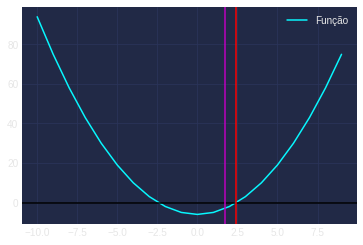

In [45]:
y = []
for i in range(-10,10):
    y.append(f3(i))

plt.style.use('cyberpunk')
plt.plot(list(range(-10,10)),y)
plt.axhline(0, color='k') # y = zero
plt.axvline(2.44, color='r') #encontrado pelo método secante e newton
plt.axvline(np.sqrt(3), color='m') #raiz de 3
plt.legend(['Função'])
plt.show()

In [46]:
print(abs(np.sqrt(3) - 2.44949)) #newton
print(abs(np.sqrt(3) - 2.449438)) #Secante

0.7174391924311228
0.7173871924311226


### Prova 2

$f(x) = [(x+2)*\sin(x)] + \cos(x) $ Possui 4 zeros entre $ [-8;+8] $.

## 1. a) obter zero da funcao f(x) entre -8 e -4:
$x_o = -8 $ e $x_1 = -4 $ para tolerancia $\epsilon = 10^{-2}$ **(Método Secante)**



In [47]:
def f_prova(x):
    return ((x+2)*np.sin(x)) + np.cos(x)

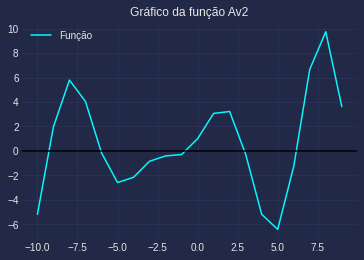

In [48]:
y = []
for i in range(-10,10):
    y.append(f_prova(i))

plt.style.use('cyberpunk')
plt.title("Gráfico da função Av2")
plt.plot(list(range(-10,10)),y)
plt.axhline(0, color='k') # y = zero
#plt.plot(x2,y2,'rx',alpha = 0.9)
plt.legend(['Função'])
plt.show()

In [49]:
secante(f_prova,-8,-4,0.01)

,k,X_k,f(X_k)
0,0,-8.000000,5.790649
1,1,-4.000000,-2.167249
2,2,-5.089357,-2.504334
3,3,3.003881,-0.303614
4,4,4.120432,-5.637030
5,5,2.940319,0.007843


In [50]:
bisseccao(f_prova,-8,-4,0.01)[2]

,k,X_k,f(X_k),a_k,b_k,b_k - a_k
0,1,-6.000000,-0.157492,-8.000000,-6.000000,2.000000
1,2,-7.000000,4.038835,-7.000000,-6.000000,1.000000
2,3,-6.500000,1.944628,-6.500000,-6.000000,0.500000
3,4,-6.250000,0.858438,-6.250000,-6.000000,0.250000
4,5,-6.125000,0.337718,-6.125000,-6.000000,0.125000
5,6,-6.062500,0.086473,-6.062500,-6.000000,0.062500
6,7,-6.031250,-0.036473,-6.062500,-6.031250,0.031250
7,8,-6.046875,0.024766,-6.046875,-6.031250,0.015625
8,9,-6.039062,-0.005913,-6.046875,-6.039062,0.007812


In [55]:
zeros = []
zero_1 = -6.039062 #Encontrado por bisseccao
zeros.append(zero_1)

## 1. b) Partindo de x_0 = -2.1 e com método de Newton

In [52]:
def f_prova_der(x):
    return (x+2)*np.cos(x)

In [53]:
ponto_fixo_newton(f_prova,f_prova_der,-2.1,0.01)

,k,X_k,f(X_k),f_deriv(X_k)
0,1,6.190153,0.234829,8.154736
1,2,6.161357,0.000760,8.100865


In [54]:
zero_2 = 6.161357
zeros.append(zero_2)

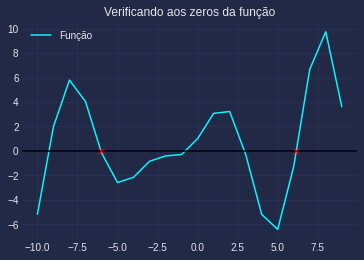

In [56]:
plt.style.use('cyberpunk')
plt.title("Verificando aos zeros da função")
plt.plot(list(range(-10,10)),y)
plt.axhline(0, color='k') # y = zero
plt.plot(zeros,[0,0],'rx',alpha = 0.9)
plt.legend(['Função'])
plt.show()

### C) bissecção entre 0 e 4

In [57]:
bisseccao(f_prova,0,4,0.01)[2]

,k,X_k,f(X_k),a_k,b_k,b_k - a_k
0,1,2.000000,3.221043,2.0000,4.000000,2.000000
1,2,3.000000,-0.284392,2.0000,3.000000,1.000000
2,3,2.500000,1.891981,2.5000,3.000000,0.500000
3,4,2.750000,0.888587,2.7500,3.000000,0.250000
4,5,2.875000,0.319625,2.8750,3.000000,0.125000
5,6,2.937500,0.021481,2.9375,3.000000,0.062500
6,7,2.968750,-0.130558,2.9375,2.968750,0.031250
7,8,2.953125,-0.054305,2.9375,2.953125,0.015625
8,9,2.945312,-0.016353,2.9375,2.945312,0.007812


In [ ]:
zeros.append(2.945312)

## 1. D) Partindo de a_0 = 5 e b_0 = 8, com método de Posição Falsa

In [58]:
posicao_falsa(f_prova,5,8,0.01)

,k,X_k,f(X_k),a_k,f(ak),b_k,f(bk),b_k - a_k
0,1,6.192221,0.251691,5.000000,-6.428808,6.192221,0.251691,1.192221
1,2,6.147303,-0.112886,6.147303,-0.112886,6.192221,0.251691,0.044917
2,3,6.161211,-0.000418,6.161211,-0.000418,6.192221,0.251691,0.031009


In [ ]:
zeros.append(6.161211)

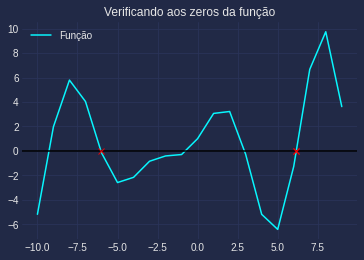

In [60]:
plt.style.use('cyberpunk')
plt.title("Verificando aos zeros da função")
plt.plot(list(range(-10,10)),y)
plt.axhline(0, color='k') # y = zero
plt.plot(zeros,[0,0,0],'rx',alpha = 0.9)
plt.legend(['Função'])
plt.show()

### Questão 2:
Tentativa de encontrar a raíz seguindo o phi que não converge (para confirmar)

In [66]:
def phi(x):
    return -(np.cos(x)/np.sin(x)) - 2 # Define a função phi(x)

def ponto_fixo(g, x0, tol, max_it):
    for i in range(max_it):
        x1 = g(x0)
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    return None

x0 = 5 # Define o valor inicial
tol = 0.01 # Define a tolerância
max_it = 100 # Define o número máximo de iterações

raiz = ponto_fixo(phi, x0, tol, max_it) # Encontra a raiz por meio do método do ponto fixo

if raiz is not None:
    print(f"A raiz da função é {raiz:.6f}.")
else:
    print("Não foi possível encontrar uma raiz com a precisão desejada.")

Não foi possível encontrar uma raiz com a precisão desejada.
